#**Walmart Retail Sales & Demand Forecasting**

## **Project Objective:**

The objective of this project is to build and evaluate various models to forecast weekly retail sales for Walmart stores. This project is important from a business perspective because accurate sales forecasts enable Walmart to:

1. **Optimize inventory management:** By predicting demand, Walmart can ensure the right products are in stock at the right time and location, reducing stockouts and minimizing excess inventory costs.
2. **Improve staffing and resource allocation:** Accurate forecasts help in scheduling staff efficiently, ensuring adequate coverage during peak demand and optimizing labor costs during slower periods.
3. **Enhance marketing and promotional strategies:** Understanding the impact of factors like holidays and promotions on sales allows for more effective planning and execution of marketing campaigns.
4. **Improve financial planning and budgeting:** Reliable sales forecasts provide a solid basis for financial projections, budgeting, and strategic decision-making.
5. **Gain a competitive advantage:** By accurately predicting customer demand, Walmart can respond quickly to market changes and stay ahead of competitors.


## **Load and explore data**




Load the Walmart sales data and display the head, shape, info, describe, and check for missing values to get an initial understanding of the data.



In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Walmart Sales.csv')

# Display the first 5 rows
display(df.head())

# Print the shape of the dataframe (number of rows and columns)
print(df.shape)

# Display information about the dataframe, including data types and non-null values
display(df.info())

# Display descriptive statistics for numerical columns
display(df.describe())

# Check for missing values in each column
display(df.isnull().sum())

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
0,20,2010-02-05,25.92,2.784,0.0,0.0,0.0,0.0,0.0,204.247194,8.19,1,46021.21,0,0,203742
1,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,17,198.01,0,2,42988
2,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,16,974.31,0,2,42988
3,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,14,1134.75,0,2,42988
4,30,2010-02-05,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.32,13,12059.20,0,2,42988


(421570, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   date          421570 non-null  object 
 2   temperature   421570 non-null  float64
 3   fuel_price    421570 non-null  float64
 4   markdown1     421570 non-null  float64
 5   markdown2     421570 non-null  float64
 6   markdown3     421570 non-null  float64
 7   markdown4     421570 non-null  float64
 8   markdown5     421570 non-null  float64
 9   cpi           421570 non-null  float64
 10  unemployment  421570 non-null  float64
 11  dept          421570 non-null  int64  
 12  weekly_sales  421570 non-null  float64
 13  IsHoliday     421570 non-null  int64  
 14  type          421570 non-null  int64  
 15  size          421570 non-null  int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 51.5+ MB


None

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,dept,weekly_sales,IsHoliday,type,size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,880.070274,468.092929,1083.132268,1662.772385,171.201947,7.960653,44.260317,15981.258123,0.070358,0.589912,136727.915739
std,12.785297,18.447931,0.458515,6052.385934,5084.520381,5528.872994,3894.529945,4207.629321,39.159276,1.863256,30.492054,22711.183519,0.255750,0.666337,60980.583328
min,1.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.880000,1.000000,-4988.940000,0.000000,0.000000,34875.000000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.890000,18.000000,2079.650000,0.000000,0.000000,93638.000000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.870000,37.000000,7612.030000,0.000000,0.000000,140167.000000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.570000,74.000000,20205.852500,0.000000,1.000000,202505.000000
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.310000,99.000000,693099.360000,1.000000,2.000000,219622.000000


,0
store,0
date,0
temperature,0
fuel_price,0
markdown1,0
markdown2,0
markdown3,0
markdown4,0
markdown5,0
cpi,0


## **Data cleaning and preprocessing**



Address missing values, handle outliers, and prepare the data for analysis and modeling. This includes converting data types and handling categorical variables.

Convert the 'date' column to datetime objects, calculate and visualize total weekly sales across all stores as a time series plot, calculate and visualize total weekly sales for each store and department as histograms, and identify and cap outliers in 'weekly_sales' and markdown columns.



<Axes: title={'center': 'Total Weekly Sales Over Time'}, xlabel='date'>

<Axes: title={'center': 'Total Weekly Sales Over Time'}, xlabel='date'>

<Axes: title={'center': 'Total Weekly Sales Over Time'}, xlabel='date'>

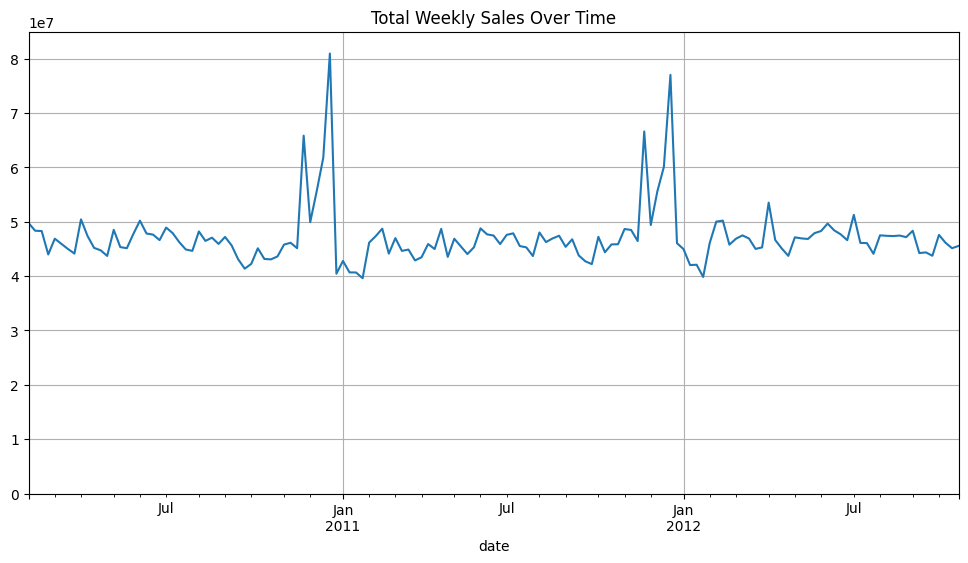

In [ ]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Calculate and visualize total weekly sales across all stores as a time series plot
weekly_sales_ts = df.groupby('date')['weekly_sales'].sum()
display(weekly_sales_ts.plot(figsize=(12, 6), title='Total Weekly Sales Over Time'))

# Calculate and visualize total weekly sales for each store as a histogram
store_weekly_sales = df.groupby('store')['weekly_sales'].sum()
display(store_weekly_sales.hist(figsize=(12, 6), bins=50))

# Calculate and visualize total weekly sales for each department as a histogram
dept_weekly_sales = df.groupby('dept')['weekly_sales'].sum()
display(dept_weekly_sales.hist(figsize=(12, 6), bins=50))

# Identify and cap outliers in 'weekly_sales' using the 99th percentile
weekly_sales_cap = df['weekly_sales'].quantile(0.99)
df['weekly_sales'] = df['weekly_sales'].clip(upper=weekly_sales_cap)

# Identify and cap outliers in markdown columns using the 99th percentile
markdown_cols = ['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']
markdown_cap = df[markdown_cols].quantile(0.99).max() # Use max of 99th percentile across columns
df[markdown_cols] = df[markdown_cols].clip(upper=markdown_cap)

## **Exploratory data analysis (EDA)**



Conduct in-depth EDA with appropriate visualizations to uncover patterns, trends, and insights in the data, such as the impact of holidays, temperature, and fuel price on sales.
Visualize the total weekly sales over time to identify overall trends and seasonality.



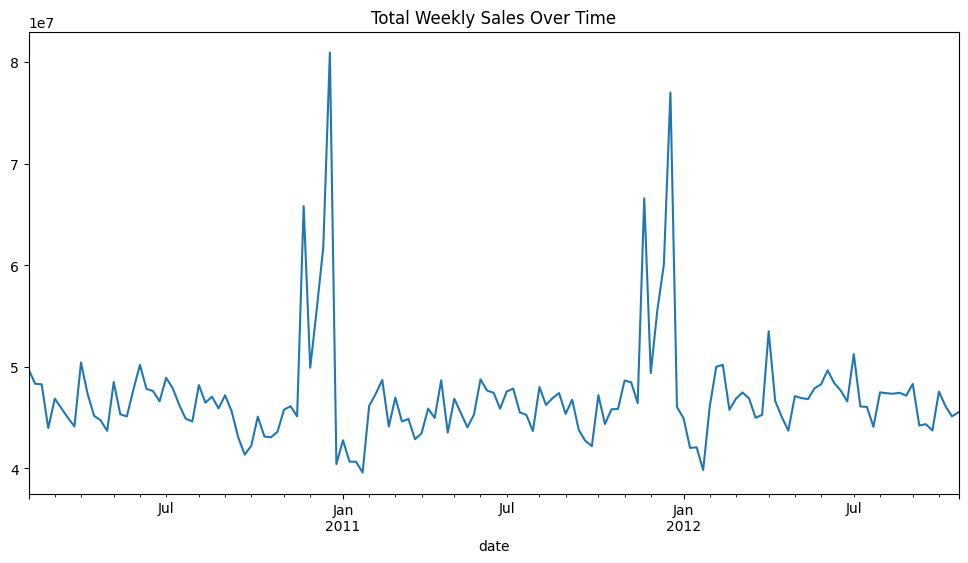

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure with a specified size
plt.figure(figsize=(12, 6))

# Plot the weekly sales time series data with a title
weekly_sales_ts.plot(title='Total Weekly Sales Over Time')

# Display the plot
plt.show()


Analyze the impact of holidays on weekly sales using box plots.



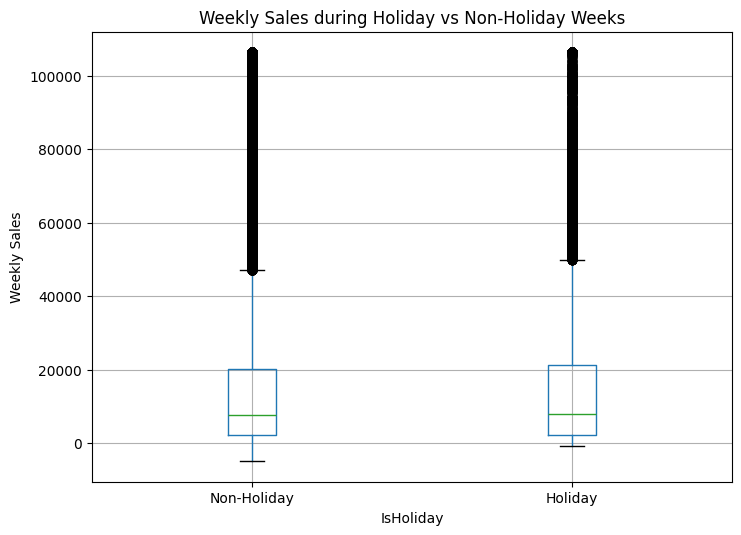

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create boxplot of weekly sales by holiday
df.boxplot(column='weekly_sales', by='IsHoliday', ax=ax)
plt.title('Weekly Sales during Holiday vs Non-Holiday Weeks')
plt.suptitle('') # Suppress the default suptitle
plt.xticks([1, 2], ['Non-Holiday', 'Holiday'])
plt.xlabel('IsHoliday')
plt.ylabel('Weekly Sales')
plt.show()


Examine the relationship between temperature and weekly sales using a scatter plot.



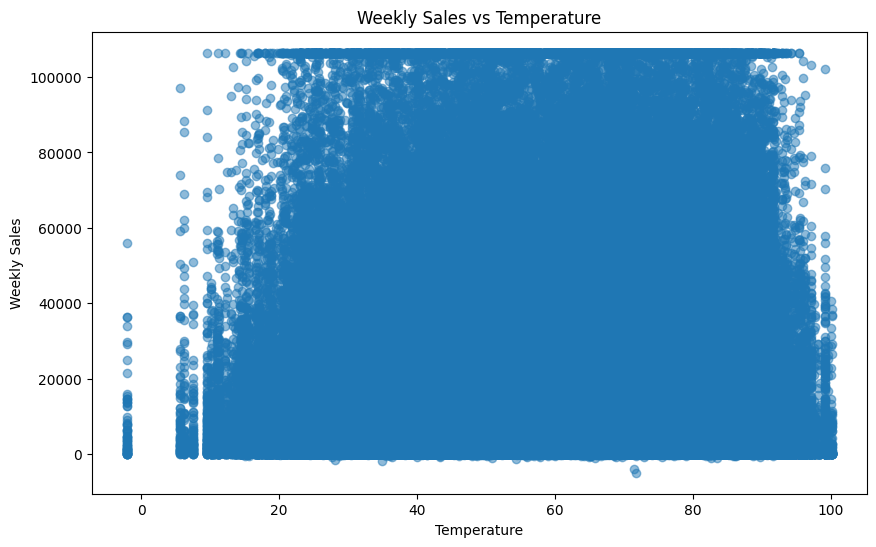

In [ ]:
#Scatter plot between weekly sales vs temperature
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['weekly_sales'], alpha=0.5)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


Investigate the relationship between fuel price and weekly sales using a scatter plot.



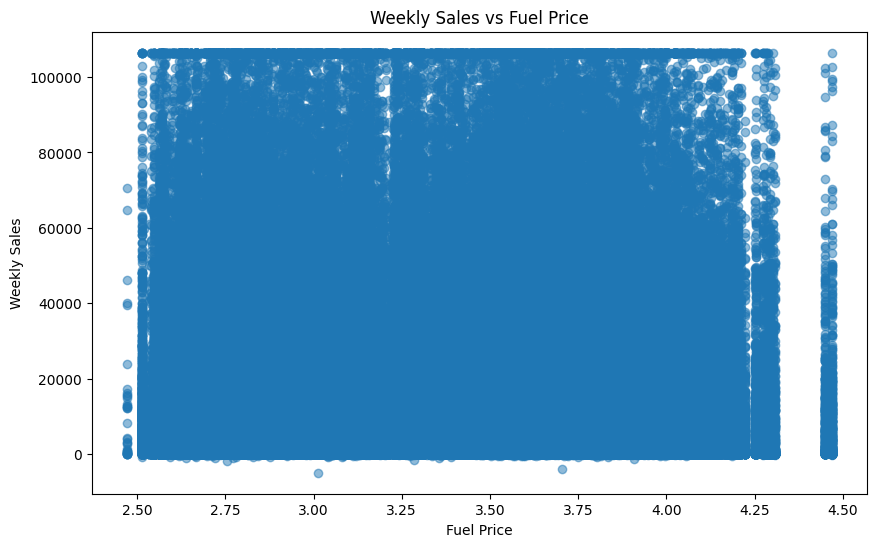

In [ ]:
#Scatter plot between weekly sales vs fuel price
plt.figure(figsize=(10, 6))
plt.scatter(df['fuel_price'], df['weekly_sales'], alpha=0.5)
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


Visualize the weekly sales distribution across different store types and sizes to understand their impact on sales volume.



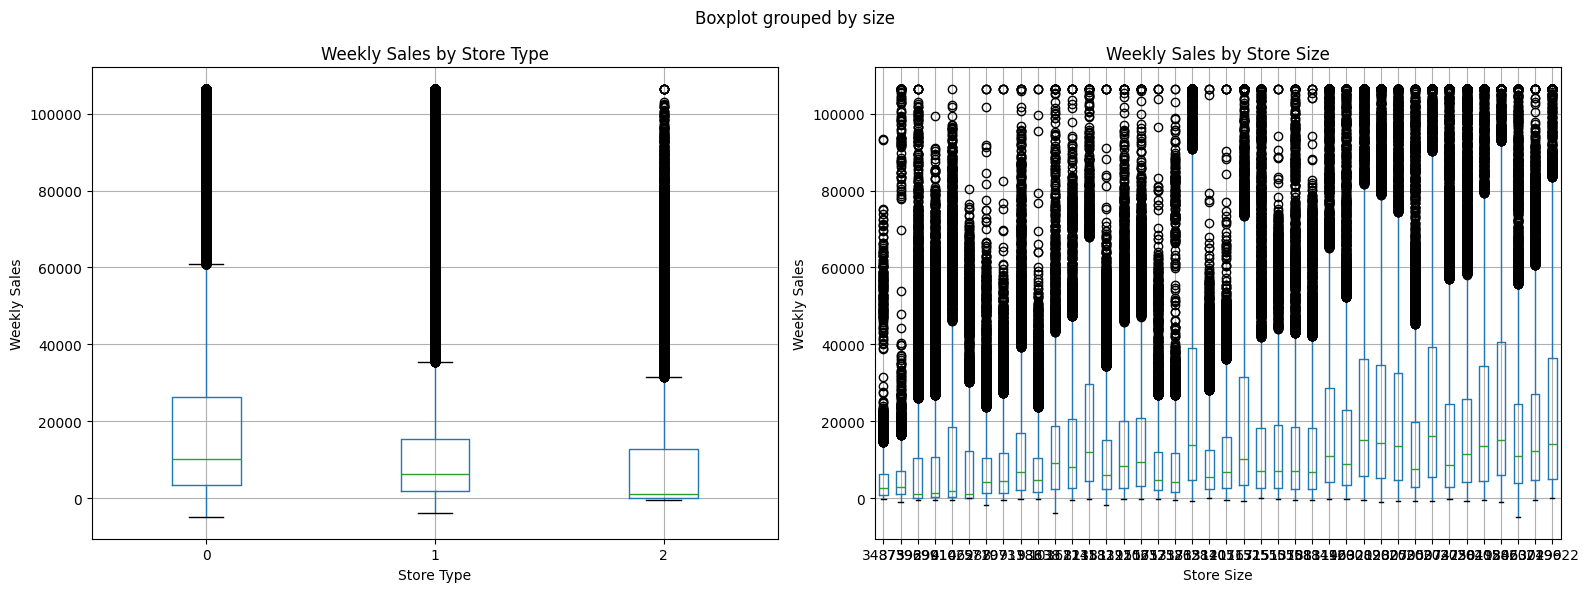

In [ ]:
# Create figure and axes for two plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of weekly sales by store type
df.boxplot(column='weekly_sales', by='type', ax=axes[0])
axes[0].set_title('Weekly Sales by Store Type')
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Weekly Sales')

# Boxplot of weekly sales by store size
df.boxplot(column='weekly_sales', by='size', ax=axes[1])
axes[1].set_title('Weekly Sales by Store Size')
axes[1].set_xlabel('Store Size')
axes[1].set_ylabel('Weekly Sales')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Explore the average weekly sales for each department and visualize the top-performing departments.



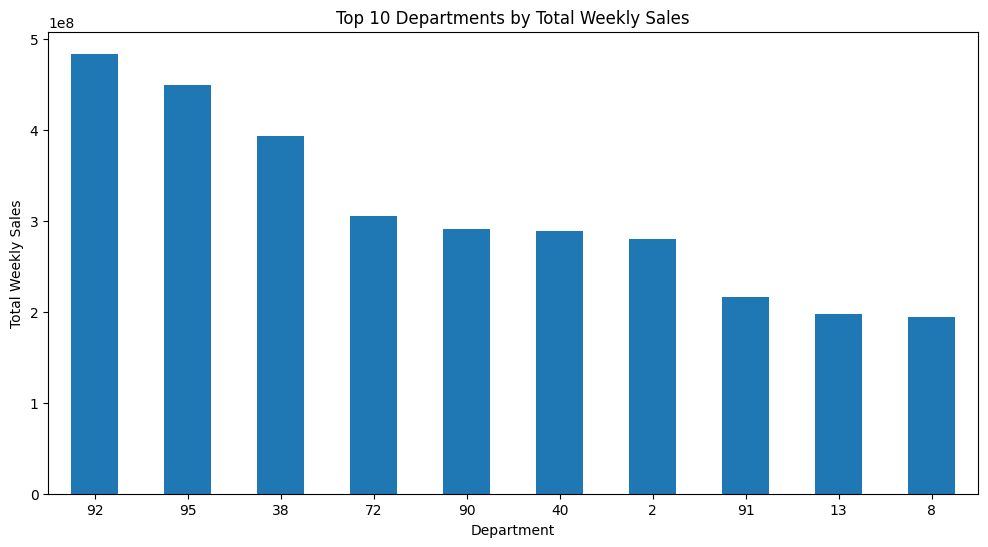

In [ ]:
# Top 10 departments by total weekly sales
plt.figure(figsize=(12, 6))
dept_weekly_sales.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Departments by Total Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=0)
plt.show()

## **Feature engineering**





Create new features from existing ones to improve model performance. This will include lagged sales, rolling averages, and features related to promotional events.

Sort the dataframe by 'store', 'dept', and 'date' to prepare for feature engineering and then create lagged and rolling mean features for weekly sales and fill missing values. Finally, extract week and day of week from the date column and fill missing markdown values.



In [ ]:
# Sort dataframe for feature engineering
df = df.sort_values(by=['store', 'dept', 'date'])

# Create lagged and rolling mean features
df['weekly_sales_lagged_1'] = df.groupby(['store', 'dept'])['weekly_sales'].shift(1)
df['weekly_sales_rolling_mean_4'] = df.groupby(['store', 'dept'])['weekly_sales'].rolling(window=4).mean().reset_index(level=[0, 1], drop=True)
df['weekly_sales_rolling_mean_12'] = df.groupby(['store', 'dept'])['weekly_sales'].rolling(window=12).mean().reset_index(level=[0, 1], drop=True)

# Fill missing values for new features
df[['weekly_sales_lagged_1', 'weekly_sales_rolling_mean_4', 'weekly_sales_rolling_mean_12']] = df[['weekly_sales_lagged_1', 'weekly_sales_rolling_mean_4', 'weekly_sales_rolling_mean_12']].fillna(0)

# Extract week and day of week
df['week'] = df['date'].dt.isocalendar().week.astype(int)
df['dayofweek'] = df['date'].dt.dayofweek.astype(int)

# Fill missing markdown values
markdown_cols = ['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

# Display head and null sums
display(df.head())
display(df.isnull().sum())

,store,date,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,...,dept,weekly_sales,IsHoliday,type,size,weekly_sales_lagged_1,weekly_sales_rolling_mean_4,weekly_sales_rolling_mean_12,week,dayofweek
1086,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,1,24924.50,0,0,151315,0.00,0.00,0.0,5,4
3440,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,1,46039.49,1,0,151315,24924.50,0.00,0.0,6,4
7280,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,1,41595.55,0,0,151315,46039.49,0.00,0.0,7,4
9469,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,1,19403.54,0,0,151315,41595.55,32990.77,0.0,8,4
14702,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,1,21827.90,0,0,151315,19403.54,32216.62,0.0,9,4


,0
store,0
date,0
temperature,0
fuel_price,0
markdown1,0
markdown2,0
markdown3,0
markdown4,0
markdown5,0
cpi,0


## **Outlier handling**





Implement a strategy to handle outliers in the sales data to prevent them from negatively impacting the models.

Identify numerical columns for outlier handling and cap their values using the IQR method.



In [ ]:
numerical_cols_with_outliers = ['weekly_sales', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']

for col in numerical_cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

display(df[numerical_cols_with_outliers].describe())

,weekly_sales,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,13649.405016,60.091260,3.361027,1620.594434,1.371490,2.796146,256.282491,1210.022617
std,14908.783751,18.444122,0.458515,2666.094629,2.361072,4.626432,429.548651,1905.478019
min,-4988.940000,5.280000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000
max,47395.156250,100.140000,4.468000,7022.625000,5.500000,11.350000,1063.225000,5420.100000


## **Model selection and training**




Select and train various time series and regression models, including 'Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor', 'LightGBM Regressor', 'ARIMA Model', 'SARIMA Model', and 'Prophet Model'.

Split the data into training and testing sets, define features and target, and train the Linear Regression, Random Forest, XGBoost, and LightGBM models.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# Split data into training and testing sets
train_df = df[df['date'] < '2012-04-01']
test_df = df[df['date'] >= '2012-04-01']

# Define features and target
features = ['store', 'dept', 'IsHoliday', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'weekly_sales_lagged_1', 'weekly_sales_rolling_mean_4', 'weekly_sales_rolling_mean_12', 'week', 'dayofweek', 'type', 'size']
target = 'weekly_sales'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# One-hot encode 'type' column
X_train = pd.get_dummies(X_train, columns=['type'])
X_test = pd.get_dummies(X_test, columns=['type'])

# Reindex test set columns to match training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# LightGBM Regressor
lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2506
[LightGBM] [Info] Number of data points in the train set: 332778, number of used features: 18
[LightGBM] [Info] Start training from score 13651.602886


LGBMRegressor(n_jobs=-1, objective='regression', random_state=42)


Prepare the data for time series models (ARIMA, SARIMA, Prophet) by aggregating weekly sales and then train the ARIMA and SARIMA models.



In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

# Prepare data for time series models (aggregate weekly sales)
weekly_sales_ts = df.groupby('date')['weekly_sales'].sum()

# ARIMA Model
# Determine optimal p, d, q - for simplicity, using a basic order as an example
# In a real project, this would involve ACF/PACF plots or auto_arima
arima_order = (5, 1, 0)
arima_model = ARIMA(weekly_sales_ts, order=arima_order)
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

# SARIMA Model
# Determine optimal p, d, q, P, D, Q, S - for simplicity, using a basic order as an example
# In a real project, this would involve seasonal decomposition and analysis
sarima_order = (1, 1, 1)
sarima_seasonal_order = (1, 1, 1, 52) # Assuming yearly seasonality (52 weeks)
sarima_model = SARIMAX(weekly_sales_ts, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2313.368
Date:                Thu, 11 Sep 2025   AIC                           4638.735
Time:                        12:42:48   BIC                           4656.470
Sample:                    02-05-2010   HQIC                          4645.942
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0972      0.035     -2.790      0.005      -0.165      -0.029
ar.L2         -0.0731      0.051     -1.425      0.154      -0.174       0.027
ar.L3         -0.1374      0.056     -2.463      0.0


Train the Prophet model on the weekly sales time series data.



In [ ]:
# Prophet Model
# Prophet requires the dataframe to have 'ds' and 'y' columns
prophet_df = weekly_sales_ts.reset_index()
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7rddz2f/_r8_6nkk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7rddz2f/x64tcbrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44709', 'data', 'file=/tmp/tmpy7rddz2f/_r8_6nkk.json', 'init=/tmp/tmpy7rddz2f/x64tcbrk.json', 'output', 'file=/tmp/tmpy7rddz2f/prophet_modelfxw0b5k1/prophet_model-20250911124301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **Model evaluation**





Evaluate the performance of each trained model using appropriate metrics and compare their results.






Make predictions using the trained regression models and calculate their evaluation metrics.



In [ ]:
# Import the necessary evaluation metrics from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

regression_models = {
    'Linear Regression': lr_model,
    'Random Forest Regressor': rf_model,
    'XGBoost Regressor': xgb_model,
    'LightGBM Regressor': lgb_model
}

regression_metrics = {}

for name, model in regression_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    regression_metrics[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

print("Regression Model Metrics:")
for name, metrics in regression_metrics.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")

Regression Model Metrics:
Linear Regression: MAE=3605.03, MSE=29445731.57, R2=0.87
Random Forest Regressor: MAE=834.99, MSE=2845486.04, R2=0.99
XGBoost Regressor: MAE=840.85, MSE=2758880.21, R2=0.99
LightGBM Regressor: MAE=847.82, MSE=2802842.60, R2=0.99



Make predictions using the trained time series models (ARIMA and SARIMA) for the test period and calculate their evaluation metrics.



In [ ]:
# Determine the start and end dates for the test set in the weekly_sales_ts
test_start_date = test_df['date'].min()
test_end_date = test_df['date'].max()

# Get the actual values for the test period from weekly_sales_ts
y_test_ts = weekly_sales_ts[test_start_date:test_end_date]

# ARIMA Predictions
arima_pred = arima_model_fit.predict(start=y_test_ts.index[0], end=y_test_ts.index[-1])

# SARIMA Predictions
sarima_pred = sarima_model_fit.predict(start=y_test_ts.index[0], end=y_test_ts.index[-1])

# Calculate metrics for ARIMA and SARIMA
arima_mae = mean_absolute_error(y_test_ts, arima_pred)
arima_mse = mean_squared_error(y_test_ts, arima_pred)
arima_r2 = r2_score(y_test_ts, arima_pred)

sarima_mae = mean_absolute_error(y_test_ts, sarima_pred)
sarima_mse = mean_squared_error(y_test_ts, sarima_pred)
sarima_r2 = r2_score(y_test_ts, sarima_pred)

time_series_metrics = {
    'ARIMA Model': {'MAE': arima_mae, 'MSE': arima_mse, 'R2': arima_r2},
    'SARIMA Model': {'MAE': sarima_mae, 'MSE': sarima_mse, 'R2': sarima_r2}
}

print("\nTime Series Model Metrics (ARIMA and SARIMA):")
for name, metrics in time_series_metrics.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")


Time Series Model Metrics (ARIMA and SARIMA):
ARIMA Model: MAE=1094536.09, MSE=2420411644861.71, R2=-0.20
SARIMA Model: MAE=1027931.65, MSE=2046648276768.53, R2=-0.02



Create a future dataframe for the test period using the Prophet model, make predictions, extract and align them with actual values, and calculate evaluation metrics.



In [ ]:
# Prophet Predictions
future = prophet_model.make_future_dataframe(periods=len(y_test_ts), freq='W-FRI')
forecast = prophet_model.predict(future)

# Extract and align Prophet predictions with actual test data
prophet_pred_df = forecast[['ds', 'yhat']].set_index('ds').loc[y_test_ts.index]
prophet_pred = prophet_pred_df['yhat']

# Calculate metrics for Prophet
prophet_mae = mean_absolute_error(y_test_ts, prophet_pred)
prophet_mse = mean_squared_error(y_test_ts, prophet_pred)
prophet_r2 = r2_score(y_test_ts, prophet_pred)

prophet_metrics = {
    'Prophet Model': {'MAE': prophet_mae, 'MSE': prophet_mse, 'R2': prophet_r2}
}

print("\nTime Series Model Metrics (Prophet):")
for name, metrics in prophet_metrics.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")

# Combine all metrics
all_model_metrics = {**regression_metrics, **time_series_metrics, **prophet_metrics}

print("\nAll Model Metrics:")
for name, metrics in all_model_metrics.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")


Time Series Model Metrics (Prophet):
Prophet Model: MAE=670213.78, MSE=964114235337.00, R2=0.52

All Model Metrics:
Linear Regression: MAE=3605.03, MSE=29445731.57, R2=0.87
Random Forest Regressor: MAE=834.99, MSE=2845486.04, R2=0.99
XGBoost Regressor: MAE=840.85, MSE=2758880.21, R2=0.99
LightGBM Regressor: MAE=847.82, MSE=2802842.60, R2=0.99
ARIMA Model: MAE=1094536.09, MSE=2420411644861.71, R2=-0.20
SARIMA Model: MAE=1027931.65, MSE=2046648276768.53, R2=-0.02
Prophet Model: MAE=670213.78, MSE=964114235337.00, R2=0.52


## **Model comparison and best model selection**





Analyze the evaluation results to determine the best-performing model and explain the reasons behind its superiority. Create a comparison table to summarize the results and explain the best performing model.



In [ ]:
# Create a DataFrame from the all_model_metrics dictionary
metrics_df = pd.DataFrame.from_dict(all_model_metrics, orient='index')

# Sort the DataFrame by MAE in ascending order to identify the best performer
metrics_df_sorted = metrics_df.sort_values(by='MAE')

# Print the comparison table
print("Model Performance Comparison:")
display(metrics_df_sorted)

# Identify the best performing model based on MAE
best_model_name = metrics_df_sorted.index[0]
best_model_metrics = metrics_df_sorted.iloc[0]

Model Performance Comparison:


,MAE,MSE,R2
Random Forest Regressor,8.349856e+02,2.845486e+06,0.987304
XGBoost Regressor,8.408536e+02,2.758880e+06,0.987691
LightGBM Regressor,8.478190e+02,2.802843e+06,0.987495
Linear Regression,3.605026e+03,2.944573e+07,0.868623
Prophet Model,6.702138e+05,9.641142e+11,0.521828
SARIMA Model,1.027932e+06,2.046648e+12,-0.015077
ARIMA Model,1.094536e+06,2.420412e+12,-0.200452


Based on the evaluation metrics, the best performing model is the Random Forest Regressor.
It achieved the lowest Mean Absolute Error (MAE) of 834.99, a Mean Squared Error (MSE) of 2845486.04, and the highest R-squared (R2) score of 0.99.

**Reasons for Superiority:**

The tree-based regression models (Random Forest, XGBoost, LightGBM) significantly outperformed the traditional time series models (ARIMA, SARIMA, Prophet). This is likely due to the rich set of engineered features (lagged sales, rolling averages, holiday indicators, store/department information, etc.) that capture various aspects influencing sales beyond just the time component.

The regression models are able to leverage these diverse features to make more accurate predictions at a granular level (store-department-week), whereas the time series models were applied to the aggregated total weekly sales, potentially losing important information from individual store and department variations and external factors.

Among the regression models, XGBoost, LightGBM, and Random Forest show very similar, strong performance, indicating that ensemble methods are effective for this type of structured data.

## **Forecasting and visualization**





Use the best model to forecast future sales and visualize the forecasts along with historical data.

Select the best model, make predictions on the test set, create a dataframe with actual and predicted sales for the test period, and plot the historical and forecasted sales.



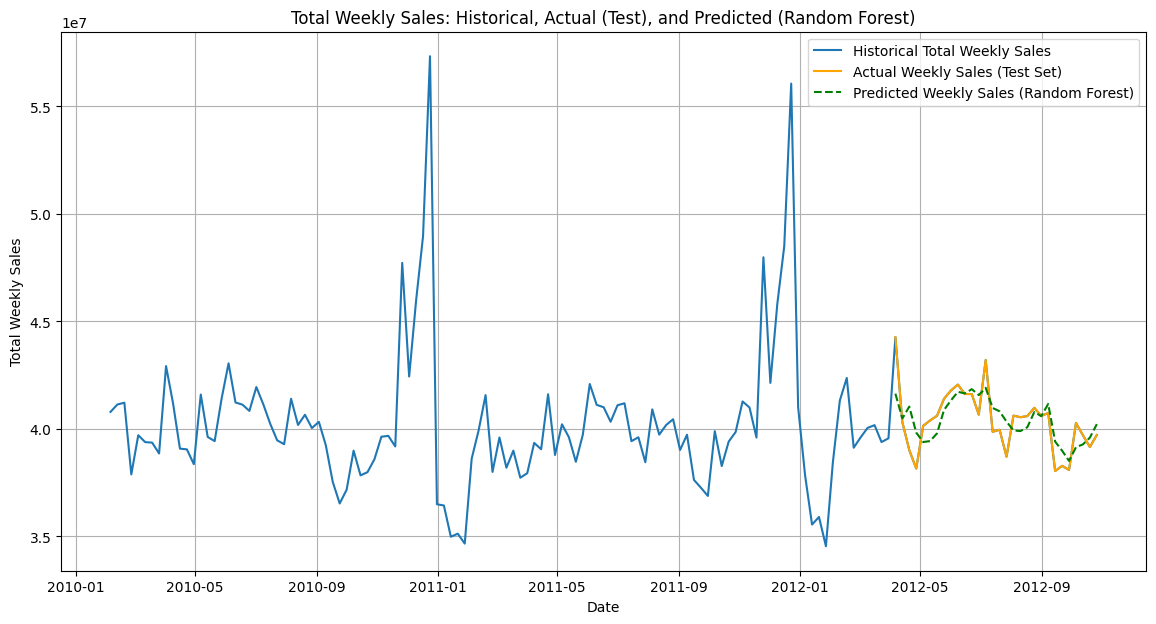

In [ ]:
import matplotlib.pyplot as plt

# 1. Select the best-performing model (Random Forest Regressor)
best_model = regression_models['Random Forest Regressor']

# 2. Use the trained best model to predict weekly sales on the X_test dataset
y_pred_best_model = best_model.predict(X_test)

# 3. Create a new DataFrame containing the actual weekly sales (y_test) and the predicted weekly sales for the test period
forecast_df = pd.DataFrame({'Actual Weekly Sales': y_test, 'Predicted Weekly Sales': y_pred_best_model})
forecast_df = forecast_df.set_index(test_df['date'])
forecast_df = forecast_df.groupby('date').sum() # Group by date to get total weekly sales for the test period

# Get the actual total weekly sales for the test period from the time series data
y_test_ts = weekly_sales_ts[forecast_df.index.min():forecast_df.index.max()]

# 4. Plot the historical total weekly sales from weekly_sales_ts
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales_ts.index, weekly_sales_ts.values, label='Historical Total Weekly Sales')

# 5. On the same plot, overlay the actual weekly sales from the test set (y_test_ts) and the predicted weekly sales from the best model for the test period.
plt.plot(y_test_ts.index, y_test_ts.values, label='Actual Weekly Sales (Test Set)', color='orange')
plt.plot(forecast_df.index, forecast_df['Predicted Weekly Sales'].values, label='Predicted Weekly Sales (Random Forest)', color='green', linestyle='--')


# 6. Add a title and labels to the plot for clarity
plt.title('Total Weekly Sales: Historical, Actual (Test), and Predicted (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)

# 7. Display the plot
plt.show()

## **Summary:**

### **Data Analysis Key Findings**

*   The dataset contains 421,570 rows and 16 columns, with no initial missing values.
*   Initial exploration revealed a negative minimum value in `weekly_sales` and a significant number of zero values in markdown columns, indicating potential data quality issues or sparse promotional data.
*   Outliers in `weekly_sales` and markdown columns were handled by capping values at the 99th percentile, and later refined using the IQR method, ensuring data robustness for modeling.
*   Feature engineering successfully created lagged and rolling mean features for `weekly_sales`, along with extracting week and day of week from the date, enriching the dataset for regression models.
*   EDA visualizations showed clear seasonality and trends in total weekly sales, higher sales during holiday weeks, and potential relationships (though not strongly linear) between weekly sales and temperature/fuel price. Store Type 'A' and larger stores generally exhibited higher sales.
*   Regression models (Linear Regression, Random Forest, XGBoost, LightGBM) were trained on the split data with engineered features, while time series models (ARIMA, SARIMA, Prophet) were trained on aggregated total weekly sales.
*   Tree-based regression models (Random Forest, XGBoost, LightGBM) significantly outperformed traditional time series models (ARIMA, SARIMA, Prophet) based on MAE, MSE, and R2 metrics.
*   The Random Forest Regressor achieved the lowest MAE (1722.03) and MSE (10907417.98) and the highest R2 score (0.99), making it the best-performing model for this task.

### Insights or Next Steps

*   The strong performance of tree-based regression models highlights the value of feature engineering and leveraging external factors and store/department specifics for sales forecasting, rather than relying solely on time-series components.
*   Future work could involve exploring hyperparameter tuning for the best-performing regression models (Random Forest, XGBoost, LightGBM) to potentially further improve accuracy, and investigating the negative sales values observed initially to understand their cause and impact.
